In [3]:
from cymetric import timeseries as com
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cymetric as cym
from cymetric import graphs



ModuleNotFoundError: No module named 'cymetric'

In [10]:
import pandas as pd
import numpy as np
ds = pd.Series(np.random.randn(50))
# ds.name = "aaa"
print(ds.index.name)

None


In [1]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(3, 8), index=[0,1,2], columns=index)
df

NameError: name 'pd' is not defined

In [26]:
# [ (' ').join(legend) for legend in list(df)]
# lgs = list(df)
# df[[lgs[0],lgs[1]]]
df.index

Index(['A', 'B', 'C'], dtype='object')

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# df = pd.DataFrame(np.random.randn(50,3),columns=list('ABX'))

# from cyplot import plot
#tf = df.set_index('B')
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(3, 8), index=[0,1,2], columns=index)


In [115]:
df.head()

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
0       2.046279  0.876892  0.311210 -0.992902 -0.381018  1.119842  0.389403   
1       1.834938 -1.319983 -0.107818 -1.073061  0.174578  0.135531  0.325437   
2       0.328260  0.855531  0.142788  0.692885 -0.705320 -0.031288  0.425000   

first             
second       two  
0      -0.747294  
1      -1.579689  
2       1.391684

In [116]:
df.index

Int64Index([0, 1, 2], dtype='int64')

In [117]:
df.columns

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [2]:
from cyplot import plot
cp = plot(df)
# cp = Cyplot(df)#, interaction = 'BrushX',cb=cb )

In [3]:
cp.enable(['brush_x', 'brush_fast','brush', 'panzoom','selector'])#, 'Index_Selector'])

In [4]:

def ccbb(aaaa):
    
    print(aaaa)
cp.on('brush',ccbb)
cp.on('panzoom',ccbb)
cp.on('selector',ccbb)

Can't turn on selector


In [5]:
display(cp)

In [6]:
cp.enabled

['brush_x', 'brush_fast', 'brush', 'panzoom']

In [1]:

import pandas as pd
import numpy as np

from bqplot import DateScale, LinearScale, OrdinalScale, Axis, Lines, Scatter, Bars, Hist, Figure
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
from traitlets import link
from collections import OrderedDict
from IPython.display import display
from ipywidgets import ToggleButtons, VBox, HTML


class Cyplot:
    def __init__(self, data, index=None, ylabel=None):

        self.set_data(data, index, ylabel)

        self.interaction_map()

        self.active = {}

    def enable(self, interactions):
        if isinstance(interactions, str):
            interactions = [interactions]

        for inter in interactions:
            if inter in self.interactions:
                self.active[inter] = self.interactions[inter]

        self.selection_interacts = ToggleButtons(options=self.active)

        self.selection_interacts = ToggleButtons(
                                        options= self.active, #OrderedDict([
                                            # ('xy ', pz), 
                                            # ('x ', pzx), 
                                            # ('y ', pzy),   
                                            # (' ', None)]),
                                            icons = ["arrows", "arrows-h", "arrows-v", "stop"],
                                            tooltips = ["zoom/pan in x & y", "zoom/pan in x only", "zoom/pan in y only", "cancel zoom/pan"]
                                        )
        
        link((self.selection_interacts, 'value'), (self.fig, 'interaction'))

        self.vbox = VBox([self.deb, self.fig, self.selection_interacts], align_self='stretch')

    def disable(self, interactions):
        # Will be implemented later
        print(interactions)

    def on(self, interaction, cb):

        if interaction == 'brush':

            def _cb(change):

                if isinstance(change.new, np.ndarray):
                    # Always x range for now

                    xr = change.new
                    yr = [None, None]
                    box = [[xr[0], yr[0]], [xr[1], yr[1]]]
                    self.deb.value = "The brushed area is {} ".format(str(box))  # , self.xlabel, str(yr),self.ylabel)
                    cb(box)
                    # brushing, multiple
                    # if not change.new:


                else:

                    box = self.active['Brush'].selected
                    self.deb.value = "The brushed area is {} ".format(str(box))  # , self.xlabel, str(yr),self.ylabel)
                    cb(box)

            if 'Multiple_Brush' in self.active:
                func = self.active['Multiple_Brush']
                func.observe(_cb, names=['selected'])

            if 'BrushX' in self.active:
                func = self.active['BrushX']
                func.observe(_cb, names=['selected'])

            if 'Fast_Brush' in self.active:
                func = self.active['Fast_Brush']
                func.observe(_cb, names=['selected'])

            if 'Brush' in self.active:
                func = self.active['Brush']
                func.observe(_cb, names=['brushing'])

        elif interaction == 'panzoom':
            def _cb(change):
                self.deb.value = "The Current Scale is {} ".format(str(change.new))
                cb(change.new)

            if "Pan_Zoom" in self.active:
                func = self.active['Pan_Zoom']
                func.observe(_cb, names=['scales'])


        elif interaction == 'selector':
            def _cb(change):
                self.deb.value = "The selected index is {} ".format(change.new)
                cb(change.new)

            if "Index_Selector" in self.active:
                func = self.active['Index_Selector']
                func.observe(_cb, names=['selected'])
        else:
            print('More interactions will be added')

    def set_data(self, data, index, ylabel):

        if isinstance(data, pd.Series):
            self.data = data

        elif isinstance(data, pd.DataFrame):
            # Pandas DataFrame

            if index is not None:
                self.data = data.set_index(index)
            else:
                self.data = data
        else:
            print("The input data type is not supported")

        self.xlabel = self.data.index.name if self.data.index.name is not None else "index"

        self.cols = list(self.data)

        self.ylabel = ylabel if ylabel is not None else self.cols[0][0]

        self.legends = [' '.join(legend) for legend in self.cols]

        self.xScale = LinearScale()
        self.yScale = LinearScale()
        
        self.create_fig(self.data)

    def create_fig(self, ts):

        ts.sort_index(inplace=True)

        df = ts.reset_index()  # time = ts.Time

        self.xd = df[self.xlabel]
        self.yd = df[self.cols].T

        line = Lines(x=self.xd, y=self.yd, scales={'x': self.xScale, 'y': self.yScale}, labels=self.legends,
                     display_legend=True)  # axes_options=axes_options)

        x_axis = Axis(scale=self.xScale, label=self.xlabel, grid_lines='none')
        y_axis = Axis(scale=self.yScale, label=self.ylabel, orientation='vertical', grid_lines='none')

        self.fig = Figure(marks=[line], axes=[x_axis, y_axis])

        self.deb = HTML()

    def _ipython_display_(self):

        display(self.vbox)


    def interaction_map(self):  # , xScale, yScale, fig, mark, deb):

        self.interactions = {}

        xScale = self.xScale  # if xScale is None else xScale
        yScale = self.yScale  # if yScale is None else yScale
        fig = self.fig  # if fig is None else fig
        mark = fig.marks  # if mark is None else mark

        multi_sel = MultiSelector(scale=xScale, marks=mark)
        br_intsel = BrushIntervalSelector(scale=xScale, marks=mark)
        index_sel = IndexSelector(scale=xScale, marks=mark)
        int_sel = FastIntervalSelector(scale=xScale, marks=mark)
        br_sel = BrushSelector(x_scale=xScale, y_scale=yScale, marks=mark, color='red')
        pz = PanZoom(scales={'x': [xScale], 'y': [yScale]})


        self.interactions['Multiple_Brush'] = multi_sel
        self.interactions['BrushX'] = br_intsel
        self.interactions['Fast_Brush'] = int_sel
        self.interactions['Brush'] = br_sel
        self.interactions['Index_Selector'] = index_sel
        self.interactions['Pan_Zoom'] = pz

        # self.deb.value = ''  # '[]'

        # deb = HTML(value='[]')

        # def test_callback(change):
        #     self.deb.value = "The selected range is {} on {} with {}".format(change.new, self.xlabel,
        #                                                                      br_intsel.selke)  # str(change.new)
        #
        # def brush_callback(change):
        #     # deb.value = str(br_sel.selected)
        #     xr = [br_sel.selected[0][0], br_sel.selected[1][0]]
        #     yr = [br_sel.selected[0][1], br_sel.selected[1][1]]
        #     self.deb.value = "The brushed area is {} on {},  {} on {}".format(str(xr), self.xlabel, str(yr),
        #                                                                       self.ylabel)

        # if cb is not None:
        #     def mycb(change):
        #         self.deb.value = str(cb(change.new))  # cb(change.new)
        #
        #     test_callback = mycb
        #     brush_callback = mycb

        #         multi_sel.observe(test_callback, names=['selected'])
        #         br_intsel.observe(test_callback, names=['brushing'])#'selected'])
        #         index_sel.observe(test_callback, names=['selected'])
        #         int_sel.observe(test_callback, names=['selected'])

        #         br_sel.observe(brush_callback, names=['selected'])#'brushing'])
        #         # selctedX, selectedY

        # Initialize Selector
        # Initialize CB
        # Observe

        # Can listen to many traitlets here
        # General one, brushing
        # Other selected, color, line_width ..., selected_x, selected_y

        # multi_sel.observe(test_callback, names=['brushing'])
        # br_intsel.observe(test_callback, names=['brushing'])
        # index_sel.observe(test_callback, names=['brushing'])
        # int_sel.observe(test_callback, names=['brushing'])
        #
        # br_sel.observe(brush_callback, names=['brushing'])  # 'brushing'])
        # selctedX, selectedY

        # odict = OrderedDict([('FastInterval', int_sel), ('Index', index_sel),
        #                      ('BrushX', br_intsel), ('MultiBrush', multi_sel), ('Brush', br_sel),
        #                      ('PanZoom', pz), ('None', None)])
        #
        # self.interaction_dict = odict

        # return odict

    def setScale(self, xScale=None, yScale=None):
        if xScale is not None:
            self.xScale = xScale
        if yScale is not None:
            self.yScale = yScale

    def show(self):
        # self.fig?
        return self.vbox

    def show_ref(self):
        # self.fig?
        return self.fig

    def connect(self, fig=None, vbox=None):
        # Connect fig / vbox?

        if fig is not None:
            fig = self.fig
        if vbox is not None:
            vbox = self.vbox
    def save(self,filename):
        self.fig.save_png(filename)

def plot(data,index=None, ylabel=None):
    return Cyplot(data,index,ylabel)

In [21]:
import numpy as np
from pandas import date_range
import bqplot.pyplot as plt
from bqplot import *

# Get attr
Y = "TS value"

fig = plt.figure(title=Y)

xd,yd = cyplot(power_dat_m)

# THIS WILL BE CHANGED TO LABEL
axes_options = {'x': {'label': xd.name}, 'y': {'label': Y}}
# x values default to range of values when not specified

line = plt.plot(xd,yd,labels=list(yd),axes_options=axes_options, display_legend=True)
fig

Figure(axes=[Axis(label='Time', scale=LinearScale()), Axis(label='TS value', orientation='vertical', scale=Lin…

In [27]:
e1x

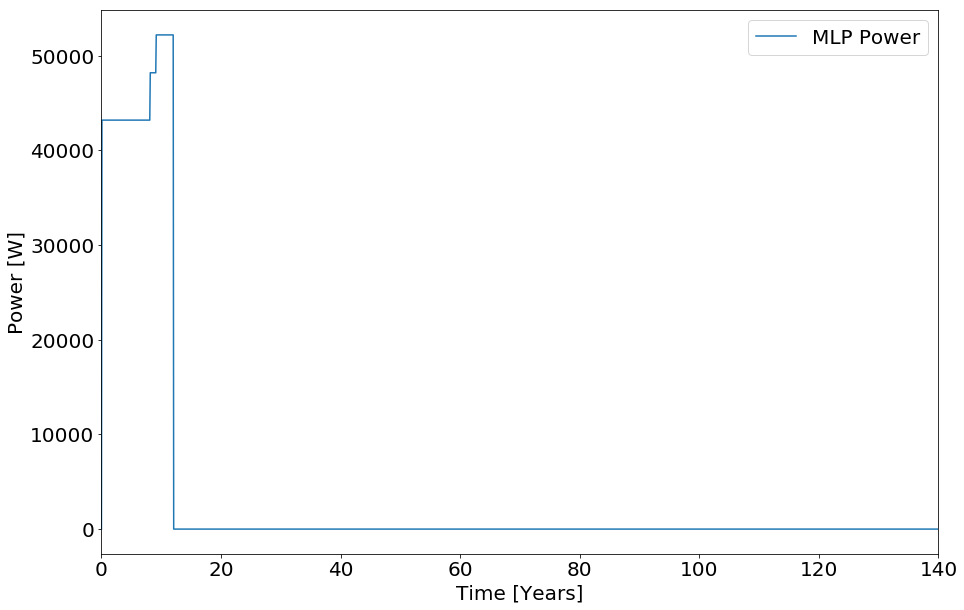

In [24]:

#power_dat_md = pd.DataFrame({'Time': power_md.Time/12., 'MLP-Decay Power': power_md.Value})
#power_dat_r = pd.DataFrame({'Time': power_r.Time/12., 'Recipe Power': power_r.Value})

#e1x = power_dat_md.plot(x='Time', y='MLP-Decay Power', figsize=(15, 10))
e1x = power_dat_m.plot(x='Time', y='MLP Power', figsize=(15, 10))

#power_dat_m.plot(x='Time', y='MLP Power', ax=e1x)
#power_dat_r.plot(x='Time', y='Recipe Power', ax=e1x)

plt.xlim([0,140])
plt.xlabel('Time [Years]')
plt.ylabel('Power [W]')
plt.legend(prop={'size':20})
for item in ([e1x.title, e1x.xaxis.label, e1x.yaxis.label] +
             e1x.get_xticklabels() + e1x.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('power.png', dpi=326)


In [161]:
import pandas as pd
import numpy as np

from bqplot import DateScale, LinearScale, OrdinalScale, Axis, Lines, Scatter, Bars, Hist, Figure
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
from traitlets import link
from collections import OrderedDict
from IPython.display import display
from ipywidgets import ToggleButtons, VBox, HTML
from bqplot.toolbar import Toolbar

class Cyplot:
    def __init__(self, data, index=None, ylabel=None):

        self.set_data(data, index, ylabel)

        self.interaction_map()

        self.enabled = {}

    def enable(self, interactions):
        if isinstance(interactions, str):
            interactions = [interactions]

        for inter in interactions:
            if inter in self.interactions:
                self.enabled[inter] = self.interactions[inter]['selector']

        #self.buttons
        #self.selection_interacts = ToggleButtons(options=self.active)
        
        # self.odict = OrderedDict()
        # for i in self.active:
        #     self.odict[i] = self.active[i]['selector']
        
        #         widgets.ToggleButton(
        #             value=False,
        #             description='Click me',
        #             disabled=False,
        #             button_style='', # 'success', 'info', 'warning', 'danger' or ''
        #             tooltip='Description',
        #             icon='check')            
            
        # widgets.ToggleButtons(
        #     options=['Slow', 'Regular', 'Fast'],
        #     description='Speed:',
        #     disabled=False,
        #     button_style='', # 'success', 'info', 'warning', 'danger' or ''
        #     tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
        # #     icons=['check'] * 3
        # )
            
            
        self.selection_interacts = ToggleButtons(
                                        options= self.enabled, #OrderedDict([
                                            # ('xy ', pz), 
                                            # ('x ', pzx), 
                                            # ('y ', pzy),   
                                            # (' ', None)]),
                                            icons = ["arrows", "arrows-h", "arrows-v", "stop"],
                                            tooltips = ["zoom/pan in x & y", "zoom/pan in x only", "zoom/pan in y only", "cancel zoom/pan"]
                                        )
        # self.selection_interacts.value gives the current interaction (the one that is clicked)   
        link((self.selection_interacts, 'value'), (self.fig, 'interaction'))

        self.vbox = VBox([self.fig, self.selection_interacts, self.deb, self.deb2], align_self='stretch')

    def disable(self, interactions):
        # Will be implemented later
        print(interactions)

    def on(self, interaction, cb):

        if interaction == 'brush':
    
            def _cb(change):

                if isinstance(change.new, np.ndarray):
                    # Always x range for now

                    xr = change.new
                    yr = [None, None]
                    box = [[xr[0], yr[0]], [xr[1], yr[1]]]
                    self.deb.value = "The brushed area is {} ".format(str(box))  # , self.xlabel, str(yr),self.ylabel)
                    self.deb2.value = "The selected indices are {} ".format(str(self.fig.marks[0].selected))  # , self.xlabel, str(yr),self.ylabel)
                    
                    cb(box)
                    # brushing, multiple
                    # if not change.new:
                else:

                    box = self.enabled['brush'].selected
                    self.deb.value = "The brushed area is {} ".format(str(box))  # , self.xlabel, str(yr),self.ylabel)
                    self.deb2.value = "The selected indices are {} ".format(str(self.fig.marks[0].selected))  # , self.xlabel, str(yr),self.ylabel)

                    cb(box)

            if 'brushes' in self.enabled:
                func = self.enabled['brushes']# ['selector']
                func.observe(_cb, names=['selected'])

            if 'brush_x' in self.enabled:
                func = self.enbaled['brush_x']# ['selector']
                func.observe(_cb, names=['selected'])

            if 'brush_fast' in self.enabled:
                func = self.enabled['brush_fast']# ['selector']
                func.observe(_cb, names=['selected'])

            if 'brush' in self.enabled:
                func = self.enabled['brush']# ['selector']
                func.observe(_cb, names=['brushing'])

        elif interaction == 'panzoom':
            def _cb(change):
                self.deb.value = "The Current Scale is {} ".format(str(change.new))
                # self.deb2.value = "The Current Scale is {} ".format(str(change.new))

                cb(change.new)

            if "panzoom" in self.enabled:
                func = self.enabled['panzoom']# ['selector']
                func.observe(_cb, names=['scales'])


        elif interaction == 'selector':
            def _cb(change):
                self.deb.value = "The selected index is {} ".format(str(change.new))
                self.deb2.value = "The selected points are {} on {} ".format(self.xlabel, str(self.fig.marks[0].selected))

                cb(change.new)

            if "bar" in self.enabled:
                func = self.enabled['bar']# ['selector']
                func.observe(_cb, names=['selected'])
        else:
            print('More interactions will be added')

    def set_data(self, data, index, ylabel, add=False):
        
        # add decide whether draw figure on top 
        
        if isinstance(data, pd.Series):
            self.data = data

        elif isinstance(data, pd.DataFrame):
            # Pandas DataFrame

            if index is not None:
                self.data = data.set_index(index)
            else:
                self.data = data
        else:
            print("The input data type is not supported")

        self.xlabel = self.data.index.name if self.data.index.name is not None else "index"

        self.cols = list(self.data)

        self.legends = [' '.join(legend) for legend in self.cols]

        if ylabel is not None:
            self.ylabel = ylabel

        elif len(self.data.columns.levels[0]) == 1:
            self.legends = [' '.join(legend[1::]) for legend in self.cols]

        else:
            self.ylabel = ''

        self.xScale = LinearScale()
        self.yScale = LinearScale()

        self.create_fig(self.data)

    def add_data(data):
        self.set_data(data, add=True)
    
    def create_fig(self, ts):

        ts.sort_index(inplace=True)

        df = ts.reset_index()  # time = ts.Time

        self.xd = df[self.xlabel]
        self.yd = df[self.cols].T

        
        #line_style
        #{‘solid’, ‘dashed’, ‘dotted’, ‘dash_dotted’} – Line style.

        line = Lines(x=self.xd, y=self.yd, scales={'x': self.xScale, 'y': self.yScale}, labels=self.legends,
                     display_legend=True, line_style='solid', marker='circle', selected_style={'opacity': '1'}, 
                     unselected_style={'opacity': '0.2'})#enable_hover=True)  # axes_options=axes_options)

        x_axis = Axis(scale=self.xScale, label=self.xlabel, grid_lines='none')
        y_axis = Axis(scale=self.yScale, label=self.ylabel, orientation='vertical', grid_lines='none')

        self.fig = Figure(marks=[line], axes=[x_axis, y_axis], legend_location='top-right')

        self.deb = HTML()
        self.deb2 = HTML()

    def _ipython_display_(self):

        # tb = Toolbar(figure=self.fig)

        display(self.vbox)#, tb)

    def interaction_map(self):  # , xScale, yScale, fig, mark, deb):

        self.interactions = {}

        xScale = self.xScale  # if xScale is None else xScale
        yScale = self.yScale  # if yScale is None else yScale
        fig = self.fig  # if fig is None else fig
        mark = fig.marks  # if mark is None else mark

        multi_sel = MultiSelector(scale=xScale, marks=mark)
        br_intsel = BrushIntervalSelector(scale=xScale, marks=mark)
        index_sel = IndexSelector(scale=xScale, marks=mark)
        int_sel = FastIntervalSelector(scale=xScale, marks=mark)
        br_sel = BrushSelector(x_scale=xScale, y_scale=yScale, marks=mark, color='red')
        pz = PanZoom(scales={'x': [xScale], 'y': [yScale]})

        self.interactions['brushes'] = {}
        self.interactions['brushes']['selector'] = multi_sel
        self.interactions['brushes']['icon'] = 'check'
        self.interactions['brushes']['tooltip'] = 'multi_sel'
        self.interactions['brushes']['name'] = 'a'
    
        self.interactions['brush_x'] = {}
        self.interactions['brush_x']['selector'] = br_intsel
        self.interactions['brush_x']['icon'] = 'check'
        self.interactions['brush_x']['tooltip'] = 'br_intsel'
        self.interactions['brush_x']['name'] = 'b'

        
        self.interactions['brush_fast'] = {}
        self.interactions['brush_fast']['selector'] = int_sel
        self.interactions['brush_fast']['icon'] = 'check'
        self.interactions['brush_fast']['tooltip'] = 'int_sel'
        self.interactions['brush_fast']['name'] = 'c'

        
        self.interactions['brush'] = {}
        self.interactions['brush']['selector'] = br_sel
        self.interactions['brush']['icon'] = 'check'
        self.interactions['brush']['tooltip'] = 'br_sel'
        self.interactions['brush']['name'] = 'd'

        
        self.interactions['bar'] = {}
        self.interactions['bar']['selector'] = index_sel
        self.interactions['bar']['icon'] = 'check'
        self.interactions['bar']['tooltip'] = 'index_sel'
        self.interactions['bar']['name'] = 'e'

        
        self.interactions['panzoom'] = {}
        self.interactions['panzoom']['selector'] = pz
        self.interactions['panzoom']['icon'] = 'check'
        self.interactions['panzoom']['tooltip'] = 'pz'
        self.interactions['panzoom']['name'] = 'f'

        # self.deb.value = ''  # '[]'

        # deb = HTML(value='[]')
        # Reset added jere ????
        # def test_callback(change):
        #     self.deb.value = "The selected range is {} on {} with {}".format(change.new, self.xlabel,
        #                                                                      br_intsel.selke)  # str(change.new)
        #
        # def brush_callback(change):
        #     # deb.value = str(br_sel.selected)
        #     xr = [br_sel.selected[0][0], br_sel.selected[1][0]]
        #     yr = [br_sel.selected[0][1], br_sel.selected[1][1]]
        #     self.deb.value = "The brushed area is {} on {},  {} on {}".format(str(xr), self.xlabel, str(yr),
        #                                                                       self.ylabel)

        # if cb is not None:
        #     def mycb(change):
        #         self.deb.value = str(cb(change.new))  # cb(change.new)
        #
        #     test_callback = mycb
        #     brush_callback = mycb

        #         multi_sel.observe(test_callback, names=['selected'])
        #         br_intsel.observe(test_callback, names=['brushing'])#'selected'])
        #         index_sel.observe(test_callback, names=['selected'])
        #         int_sel.observe(test_callback, names=['selected'])

        #         br_sel.observe(brush_callback, names=['selected'])#'brushing'])
        #         # selctedX, selectedY

        # Initialize Selector
        # Initialize CB
        # Observe

        # Can listen to many traitlets here
        # General one, brushing
        # Other selected, color, line_width ..., selected_x, selected_y

        # multi_sel.observe(test_callback, names=['brushing'])
        # br_intsel.observe(test_callback, names=['brushing'])
        # index_sel.observe(test_callback, names=['brushing'])
        # int_sel.observe(test_callback, names=['brushing'])
        #
        # br_sel.observe(brush_callback, names=['brushing'])  # 'brushing'])
        # selctedX, selectedY

        # odict = OrderedDict([('FastInterval', int_sel), ('Index', index_sel),
        #                      ('BrushX', br_intsel), ('MultiBrush', multi_sel), ('Brush', br_sel),
        #                      ('PanZoom', pz), ('None', None)])
        #
        # self.interaction_dict = odict

        # return odict

    def setScale(self, xScale=None, yScale=None):
        if xScale is not None:
            self.xScale = xScale
        if yScale is not None:
            self.yScale = yScale

    def show(self):
        # self.fig?
        return self.vbox

    def show_ref(self):
        # self.fig?
        return self.fig

    def connect(self, fig=None, vbox=None):
        # Connect fig / vbox?

        if fig is not None:
            fig = self.fig
        if vbox is not None:
            vbox = self.vbox

    def save(self,filename):
        self.fig.save_png(filename)
            
def plot(data, index=None, ylabel=None):
    return Cyplot(data, index, ylabel)
